In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Cleaning

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## finding null values

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are 11 rows with no monthly charges. we will be removing them from our dataset

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no more rows with null data from this point onwards

In [8]:
len(df)

7032

## removing duplicated data

In [9]:
# use customer_id to identify duplicates and remove data
df.drop_duplicates(subset=['customerID'], inplace=True)
len(df)

7032

no duplicated data found

## finding outliers in data

In [10]:
df.describe()[['tenure', 'MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
fig = px.box(df, y='tenure')

fig.show()

In [12]:
fig = px.box(df, y='MonthlyCharges')

fig.show()

In [13]:
fig = px.box(df, y='TotalCharges')

fig.show()

no apparent outliers to remove. 

# EDA

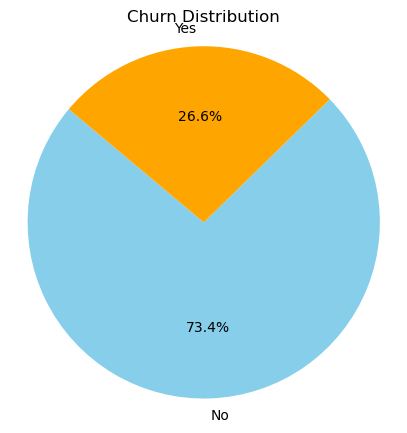

In [14]:
# finding distribution of churn vs non churn
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


There are about 26.6% of customers who churned and 73.4% who did not churn. We will further break it down into the different categories to further explore the distributions of churn vs non churn customers.
There is an imbalance of non churn to churn customers which suggests that the dataset is highly imbalanced. We will not be removing non churn customers.


### Churn vs Gender

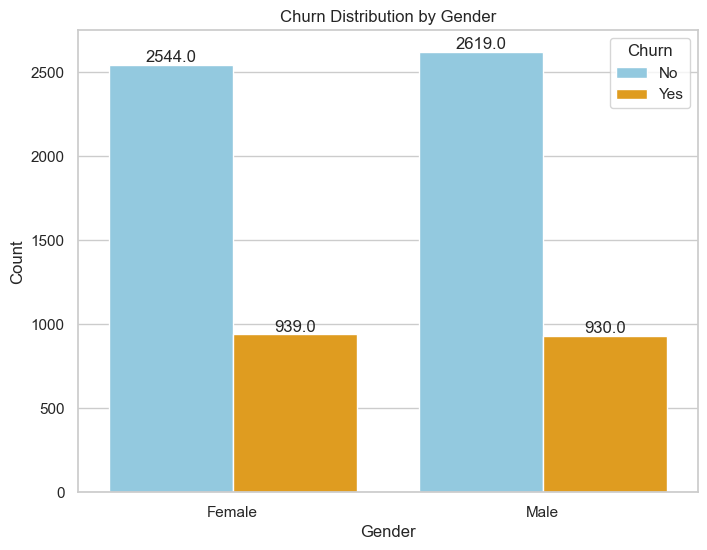

In [15]:
# finding distribution of churn vs non churn differentiated by gender
churn_colors = {'Yes': 'orange', 'No': 'skyblue'}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="gender", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Distribution by Gender")

# Show the plot
plt.show()

We conducted an analysis of the correlation between gender and churn patterns, revealing that the proportion of females to males among both churning and non-churning customers closely mirrors the distribution observed in the entire population. This resemblance in churn rates implies that gender does not appear to have a significant impact on customer attrition.

### Churn vs Senior Citizen

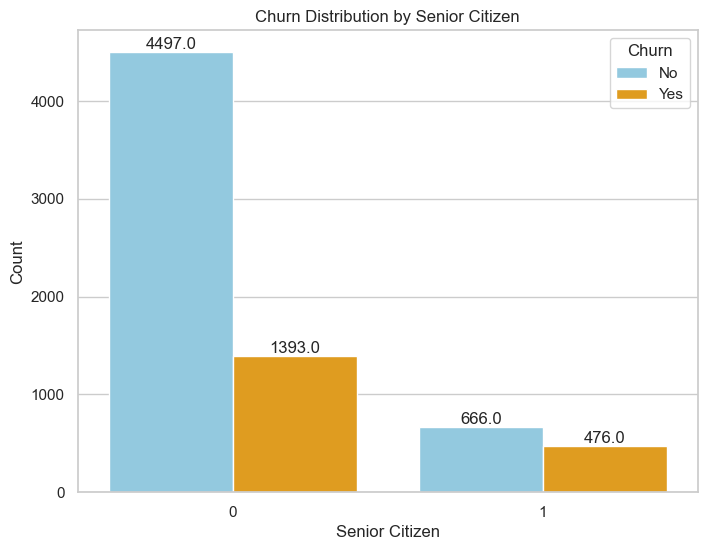

In [16]:
# finding distribution of churn vs non churn differentiated by Senior Citizen
churn_colors = {'Yes': 'orange', 'No': 'skyblue'}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn Distribution by Senior Citizen")

# Show the plot
plt.show()

`SeniorCitizen` = 0 represents not senior citizen.<br>
`SeniorCitizen` = 1 represents senior citizen.<br>
The demographic distribution indicates a prevalence of non-senior citizens over senior citizens. The churn analysis reveals a comparatively lower churn rate among non-senior citizens, as compared with a significantly lower churn rate observed within the senior citizen segment.

### Churn vs Partner
Whether the customer has a partner or not (Yes, No)

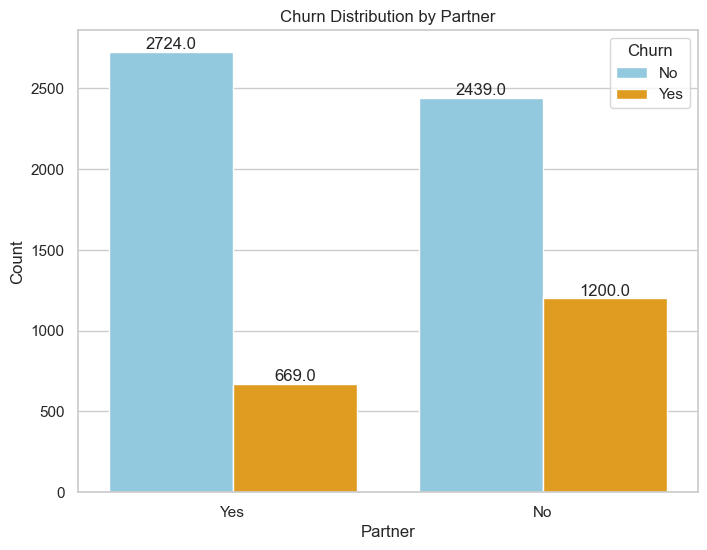

In [17]:
#finding distribution of churn vs non churn differentiated by Partner


# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Partner", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn Distribution by Partner")

# Show the plot
plt.show()

The demographic shows that there is a higher churn rate for customers who do not have partners as compared to those who have partners.

### Churn vs Multiple Lines

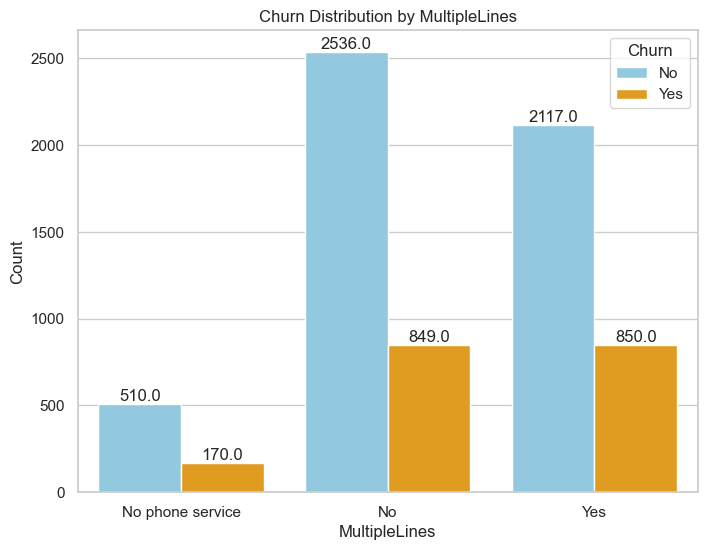

In [18]:
#finding distribution of churn vs non churn differentiated by Multiple Lines

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

Customers who do not have multiple lines are less likely to churn as compared to those who have multiple lines. 

### Churn vs Internet Service

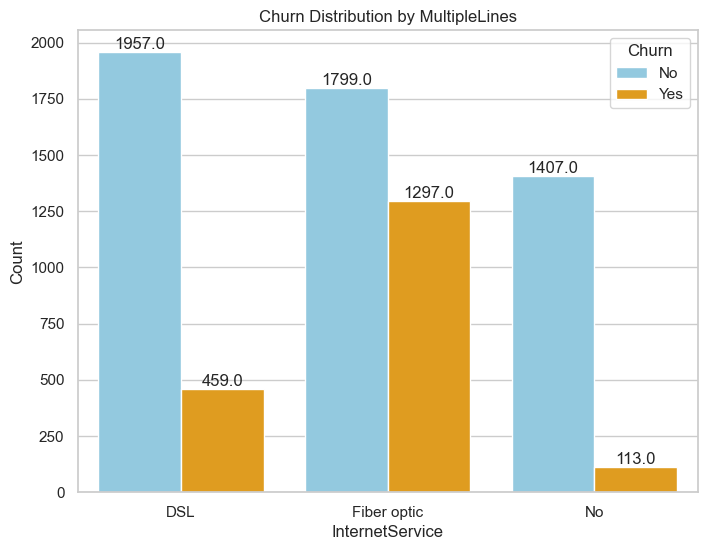

In [19]:
#finding distribution of churn vs non churn differentiated by Internet Service

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="InternetService", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

Customers who have an internet service of Fiber optic have a significantly higher churn rate as compared to customers who have an internet service of DSL or do not have an internet service. 

### Churn vs Contract

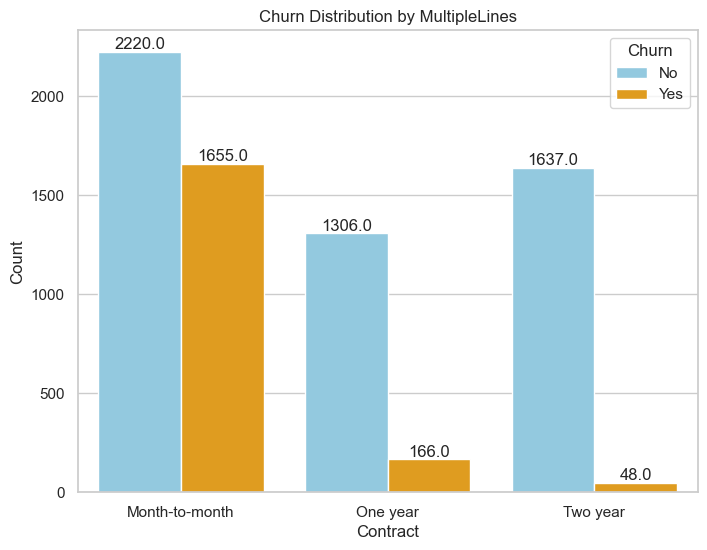

In [20]:
#finding distribution of churn vs non churn differentiated by Contract

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Contract", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

The analysis indicates that customers who opt for month-to-month contracts exhibit notably higher churn rates than those who commit to longer contracts. This pattern suggests a link between customer loyalty and contract duration: individuals who are satisfied with the service tend to opt for extended contracts, while those with monthly plans may not perceive the same level of satisfaction.

### Churn vs PaperlessBilling

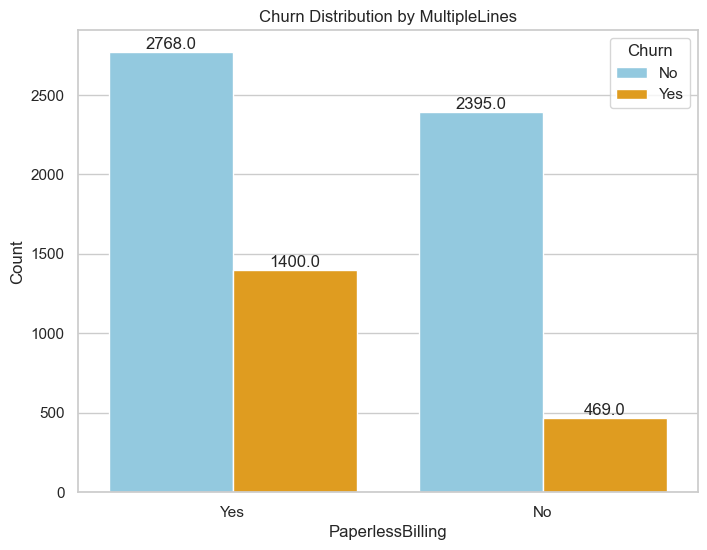

In [21]:
#finding distribution of churn vs non churn differentiated by Paperless Billing

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Add labels and a title
plt.xlabel("PaperlessBilling")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

Customer who opt for Paperless Billing are seen to have a higher churn rate as compared to those who did not opt for Paperless Billing. 

### Churn vs PaymentMethod

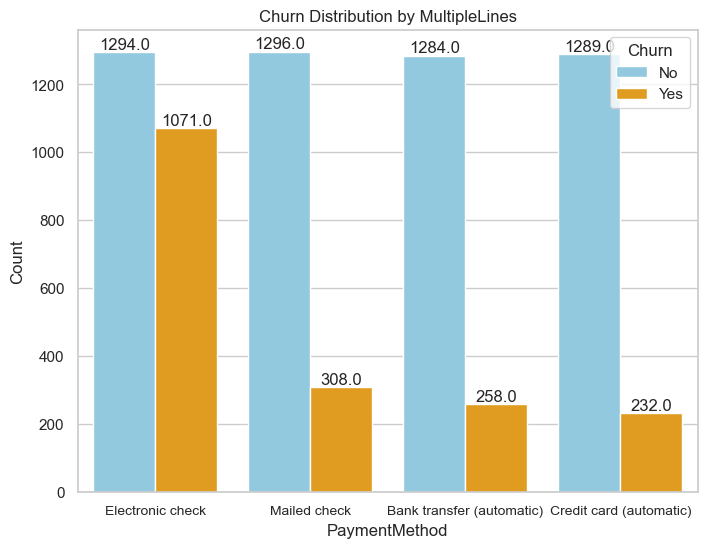

In [22]:
#finding distribution of churn vs non churn differentiated by Payment Method
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette=churn_colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
plt.xticks(fontsize=10)
# Add labels and a title
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.title("Churn Distribution by MultipleLines")

# Show the plot
plt.show()

Customers who opted to make their payment using Electronic Check are seen to have a much higher churn rate as compared to customers who opted for other mods of payment methods. 

### Churn vs Tenure
finding the trend of churned customers and how many months they have stayed until they churned

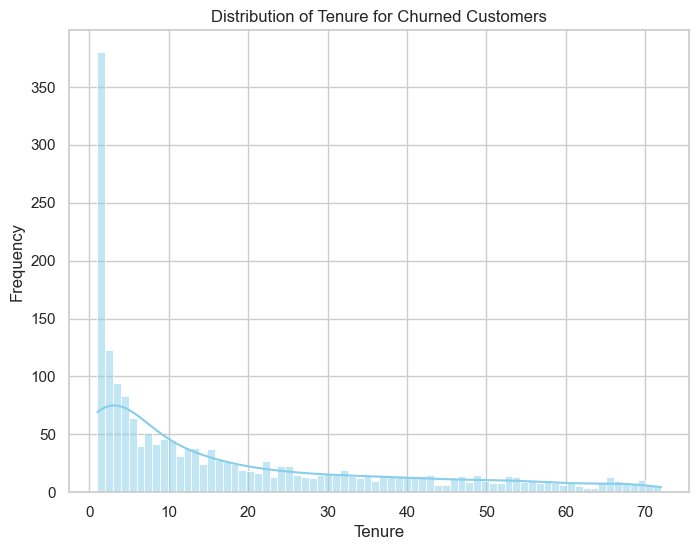

In [23]:
df_churn = df[df['Churn'] == "Yes"]

plt.figure(figsize=(8, 6))
sns.histplot(df_churn['tenure'], bins=72, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Distribution of Tenure for Churned Customers")

# Show the plot
plt.show()


Max Value of Tenure is 72. We set `bins` = 72 to identify the number of monthss which have the highest number of churn. Customers are seen to have the highest churn after the first month. Most of the churned customers churned after the first 5 months.

Customers who stayed with the company

### Churn vs Charges
finding out churned customers and their charges with the company

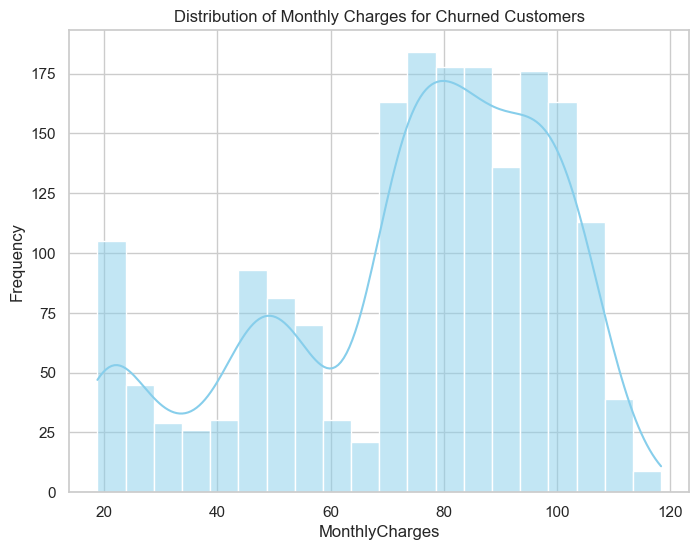

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['MonthlyCharges'], bins=20, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("MonthlyCharges")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Charges for Churned Customers")

# Show the plot
plt.show()


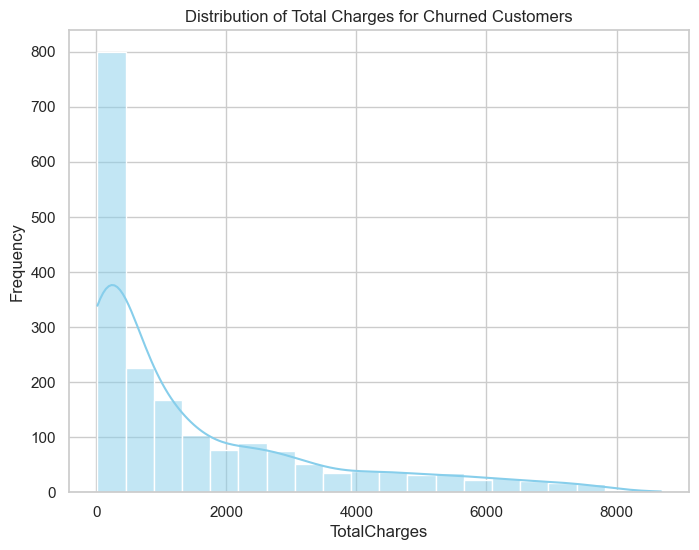

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['TotalCharges'], bins=20, kde=True, color='skyblue')

# Add labels and a title
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")
plt.title("Distribution of Total Charges for Churned Customers")

# Show the plot
plt.show()


# Changing Column values to the correct type

In [26]:
# perform one-hot encoding on gender column
encoded_gender = pd.get_dummies(df['gender'], prefix='gender')
df_encoded = pd.concat([df, encoded_gender], axis=1)
df_encoded.drop('gender', axis=1, inplace=True)

# perform one-hot encoding on payment method column
encoded_gender = pd.get_dummies(df_encoded['PaymentMethod'], prefix='payment')
df_encoded_2 = pd.concat([df_encoded, encoded_gender], axis=1)
df_encoded_2.drop('PaymentMethod', axis=1, inplace=True)

# perform one-hot encoding on internet service column
encoded_gender = pd.get_dummies(df_encoded_2['InternetService'], prefix='internet')
df_encoded_3 = pd.concat([df_encoded_2, encoded_gender], axis=1)
df_encoded_3.drop('InternetService', axis=1, inplace=True)

In [27]:
# predictor variable CHURN. yes = 1, no = 0
df_encoded_3['Churn'] = df_encoded_3['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Partner. yes = 1, no = 0
df_encoded_3['Partner'] = df_encoded_3['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

# Dependents. yes = 1, no = 0
df_encoded_3['Dependents'] = df_encoded_3['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

# phone service.  yes = 1, no = 0
df_encoded_3['PhoneService'] = df_encoded_3['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

# multiple lines. no phone service = 2, yes = 1, no = 0
df_encoded_3['MultipleLines'] = df_encoded_3['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

# OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies No internet service = 2, yes = 1, no = 0
df_encoded_3['OnlineSecurity'] = df_encoded_3['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df_encoded_3['OnlineBackup'] = df_encoded_3['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df_encoded_3['DeviceProtection'] = df_encoded_3['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df_encoded_3['TechSupport'] = df_encoded_3['TechSupport'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df_encoded_3['StreamingTV'] = df_encoded_3['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))
df_encoded_3['StreamingMovies'] = df_encoded_3['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

# Contract. two year = 2, one year = 1, month-to-month = 0
df_encoded_3['Contract'] = df_encoded_3['Contract'].apply(lambda x: 1 if x == 'One year' else (0 if x == 'Month-to-month' else 2))

# PaperlessBilling. yes = 1, no = 0
df_encoded_3['PaperlessBilling'] = df_encoded_3['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)



In [28]:
df_encoded_3

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,gender_Female,gender_Male,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,internet_DSL,internet_Fiber optic,internet_No
0,7590-VHVEG,0,1,0,1,0,2,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,1,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,2,1,0,1,...,0,0,1,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,...,0,0,1,0,0,0,1,1,0,0
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,4801-JZAZL,0,1,1,11,0,2,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0


# Feature Selection

In [29]:
# dropping predicting column, churn to identify features
df_features = df_encoded_3.drop('Churn', axis = 1)
df_features

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,gender_Female,gender_Male,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,internet_DSL,internet_Fiber optic,internet_No
0,7590-VHVEG,0,1,0,1,0,2,0,1,0,...,29.85,1,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,0,1,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,2,1,0,1,...,1840.75,0,1,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,...,1990.50,0,1,0,0,0,1,1,0,0
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,...,7362.90,1,0,0,1,0,0,0,1,0
7040,4801-JZAZL,0,1,1,11,0,2,1,0,0,...,346.45,1,0,0,0,1,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,306.60,0,1,0,0,0,1,0,1,0


/var/folders/03/rh1df1yd5y7bb1shd2_734pw0000gn/T/ipykernel_98702/2557106175.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



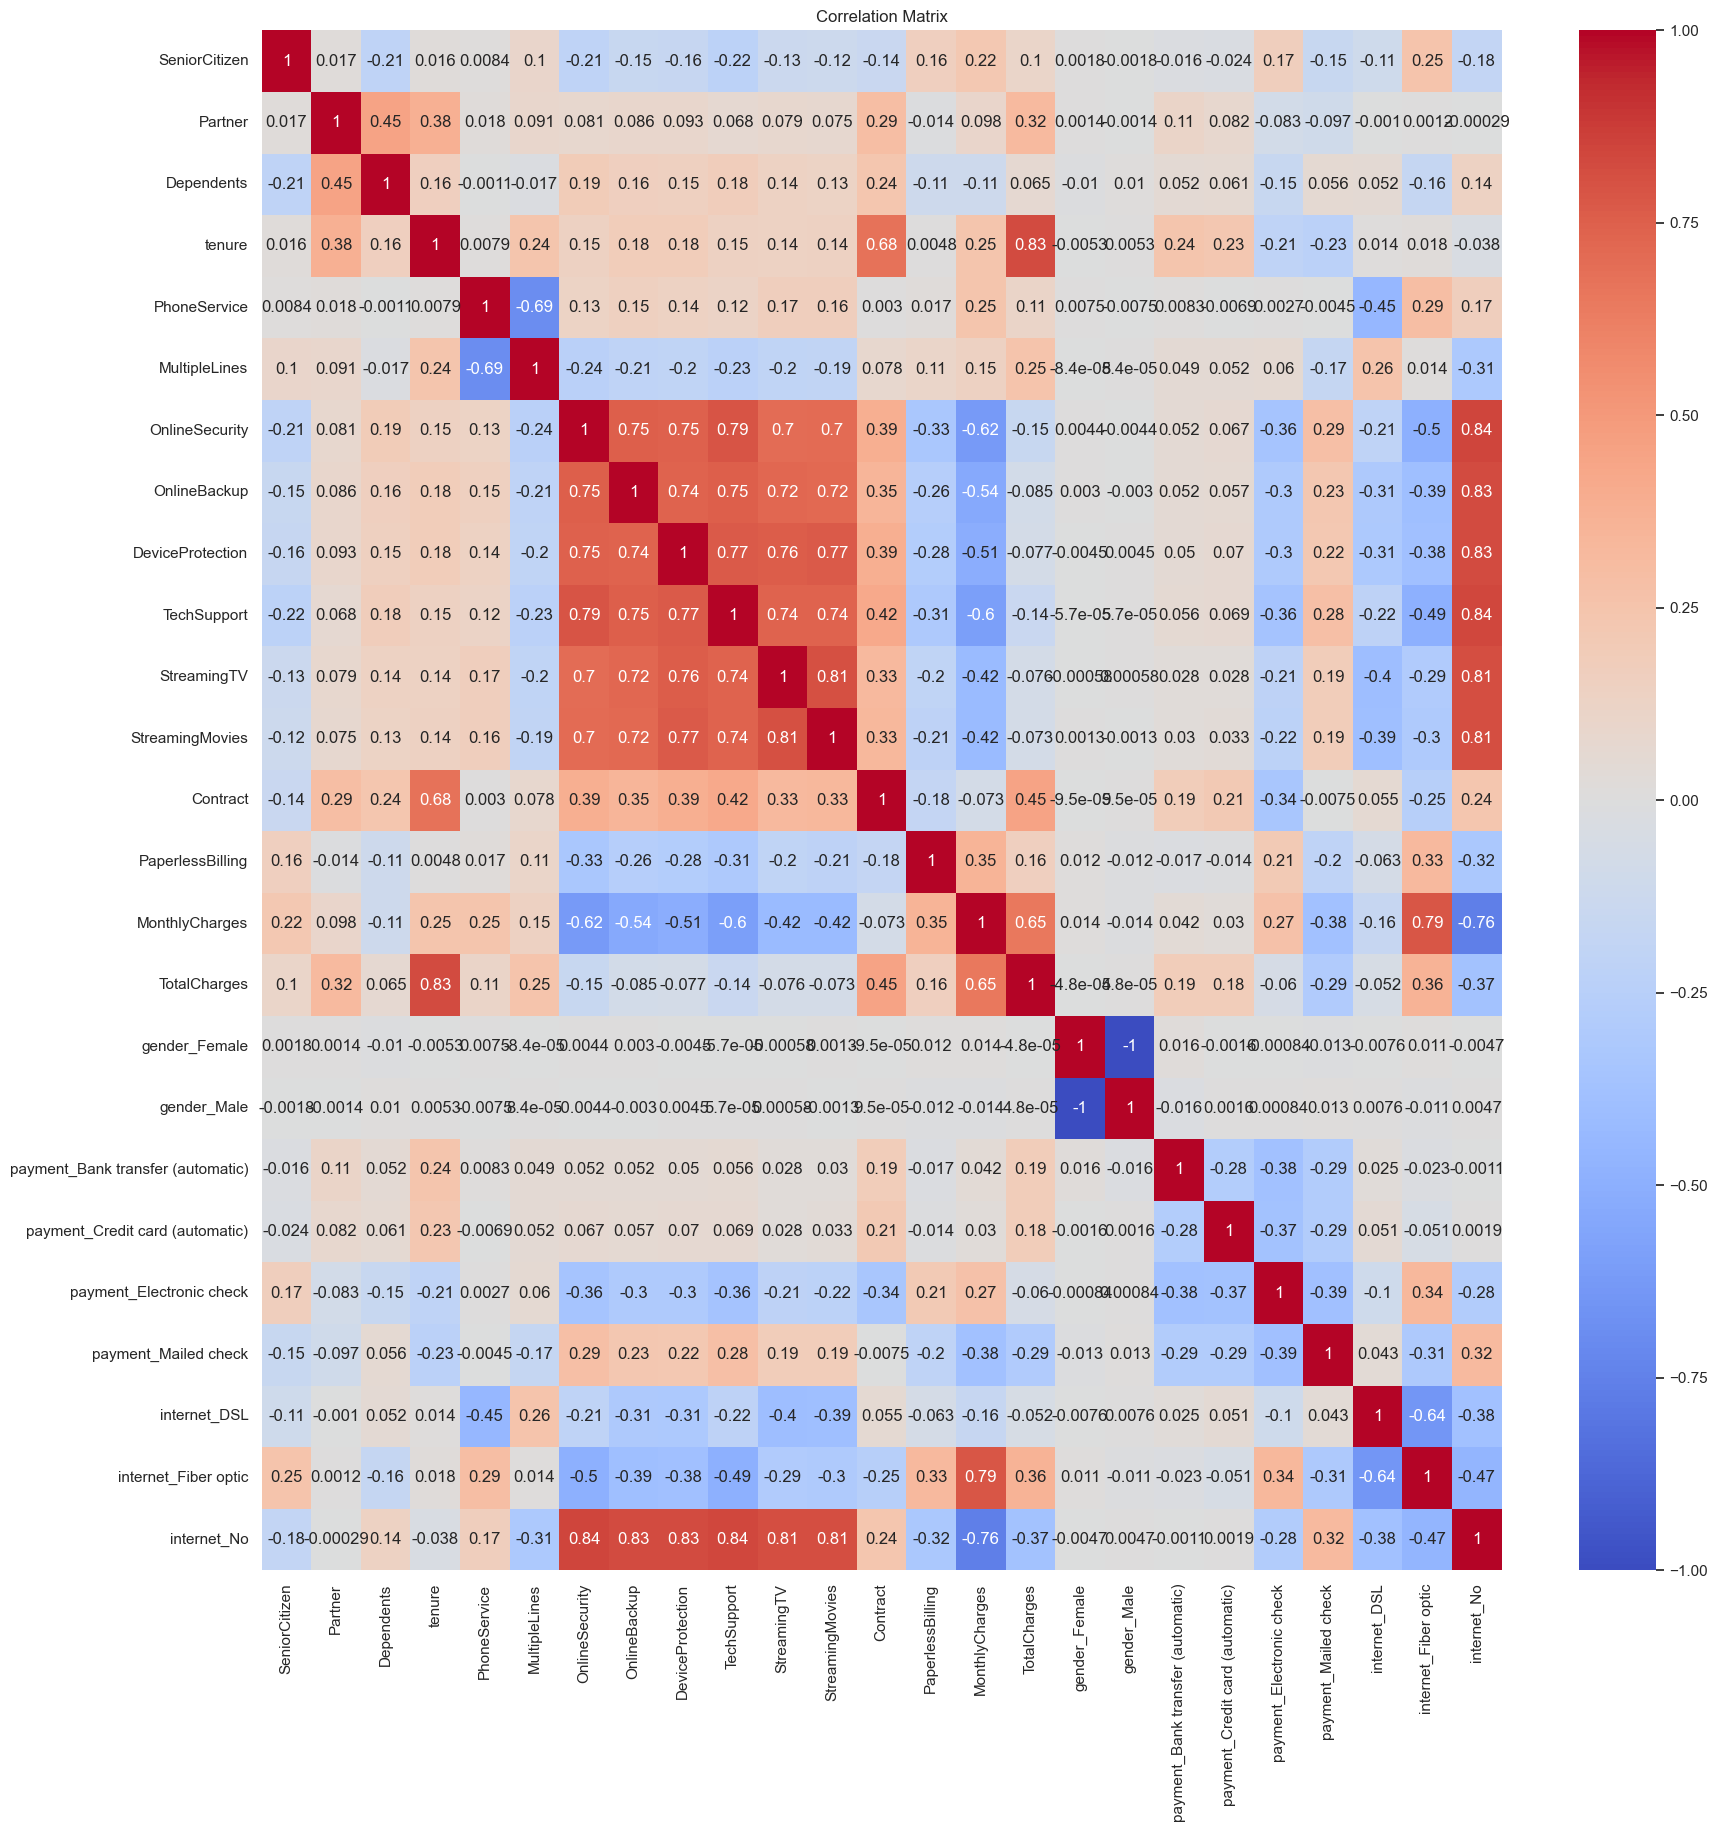

In [30]:
# plotting correlation matrix 
# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set up the figure and axis
plt.figure(figsize=(20,20))

# Plot the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add a title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

We identify that columns `OnlineSecurity`, `OnlineBackup`, `DeviceProetection`, `TechSupport`, `StreamingTv`, `StreamingMovies`, `MonthlyCharges`, `gender_Female` and `gender_male` have high correlation with each other. We will only be removing `MonthlyCharges` and we will `TotalCharges` as our price feature.

In [31]:
df_features.drop('MonthlyCharges', axis = 1, inplace = True)

In [32]:
df_features.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'TotalCharges', 'gender_Female',
       'gender_Male', 'payment_Bank transfer (automatic)',
       'payment_Credit card (automatic)', 'payment_Electronic check',
       'payment_Mailed check', 'internet_DSL', 'internet_Fiber optic',
       'internet_No'],
      dtype='object')

# Splitting dataset

In [33]:
y = df_encoded_3['Churn']
x = df_features.drop('customerID', axis = 1)
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,gender_Female,gender_Male,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,internet_DSL,internet_Fiber optic,internet_No
0,0,1,0,1,0,2,0,1,0,0,...,29.85,1,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,0,1,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,108.15,0,1,0,0,0,1,1,0,0
3,0,0,0,45,0,2,1,0,1,1,...,1840.75,0,1,1,0,0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1990.50,0,1,0,0,0,1,1,0,0
7039,0,1,1,72,1,1,0,1,1,0,...,7362.90,1,0,0,1,0,0,0,1,0
7040,0,1,1,11,0,2,1,0,0,0,...,346.45,1,0,0,0,1,0,1,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,306.60,0,1,0,0,0,1,0,1,0


In [34]:
df_features.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'TotalCharges', 'gender_Female',
       'gender_Male', 'payment_Bank transfer (automatic)',
       'payment_Credit card (automatic)', 'payment_Electronic check',
       'payment_Mailed check', 'internet_DSL', 'internet_Fiber optic',
       'internet_No'],
      dtype='object')

In [35]:
# scaling the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,gender_Female,gender_Male,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,internet_DSL,internet_Fiber optic,internet_No
0,0,1,0,1,0,2,0,1,0,0,...,29.85,1,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,0,1,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,108.15,0,1,0,0,0,1,1,0,0
3,0,0,0,45,0,2,1,0,1,1,...,1840.75,0,1,1,0,0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,0,0,1,0,0,1,0


In [36]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# to tackle the imbalance in the dataset, we will be using SMOTE oversampling 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


We will be using these models: Random Forest, XGBoost, Neural Network, SVM, Naive Bayes and Modified Decision Tree (with pruning).
As the dataset we are dealing with is highly imbalanced, we have applied SMOTE to over-sample the dataset. Instead of a normal Decision Tree, Modified Decision Tree with pruning is chosen such that it removes parts of the tree that do not contribute significantly to improving its performance. This can help simplify the tree and reduce overfitting.

In [38]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)
nn_predictions = nn_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
nb_predictions = nb_model.predict(X_test)

# Modified Decision Tree (e.g., with pruning)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_model.predict(X_test)

# Evaluate the models (using appropriate evaluation metrics)
from sklearn.metrics import classification_report

print("Random Forest:")
print(classification_report(y_test, rf_predictions))

print("XGBoost:")
print(classification_report(y_test, xgb_predictions))

print("Neural Network:")
print(classification_report(y_test, nn_predictions))

print("SVM:")
print(classification_report(y_test, svm_predictions))

print("Naive Bayes:")
print(classification_report(y_test, nb_predictions))

print("Modified Decision Tree:")
print(classification_report(y_test, dt_predictions))

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407

XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.55      0.54      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407

Neural Network:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.41      0.49       374

    accuracy                           0.78      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.76      0.78 

We will be using F1 Score as our metric to rank the models due to the class imbalance as previously mentioned that is found in the dataset. <br>
We found that Random Forest and XGboost have the heighest weighted average F1-score of 0.76. This indicates a good balance between precision and recall. We will be focusing on these 3 models.

# Feature Importance Analysis
Analysing how the features contribue to the model's predictions and identifying the most influential features.

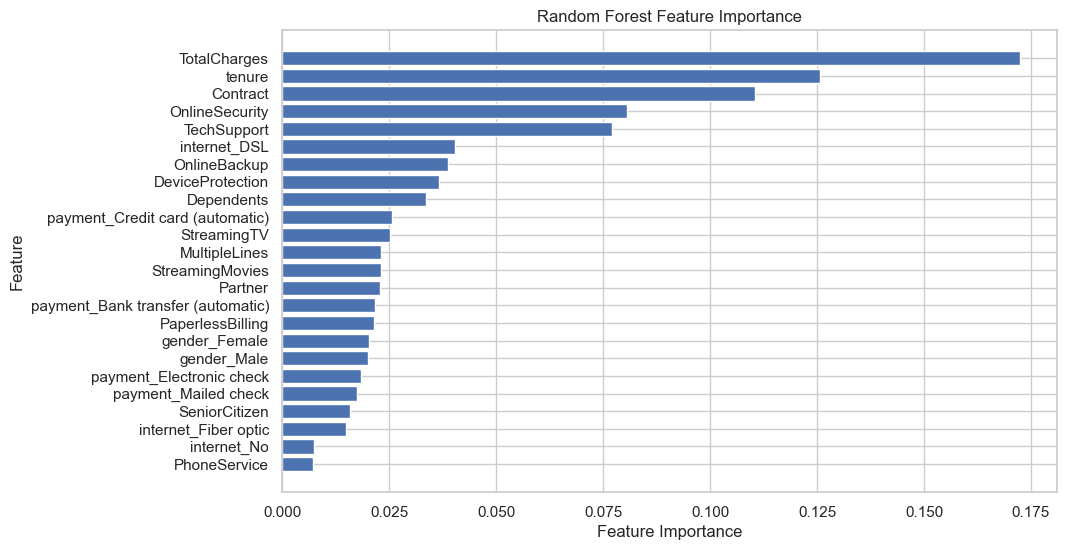

In [39]:
#Random Forest
importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is your feature matrix

# Create a sorted index based on feature importances
sorted_index = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_index)), importances[sorted_index], align="center")
plt.yticks(range(len(sorted_index)), [feature_names[i] for i in sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

For the RF model, we see that `TotalCharges`,`tenure`, `Contract`, `OnlineSecurity`,  and `TechSupport` are the top 5 most importance features. 

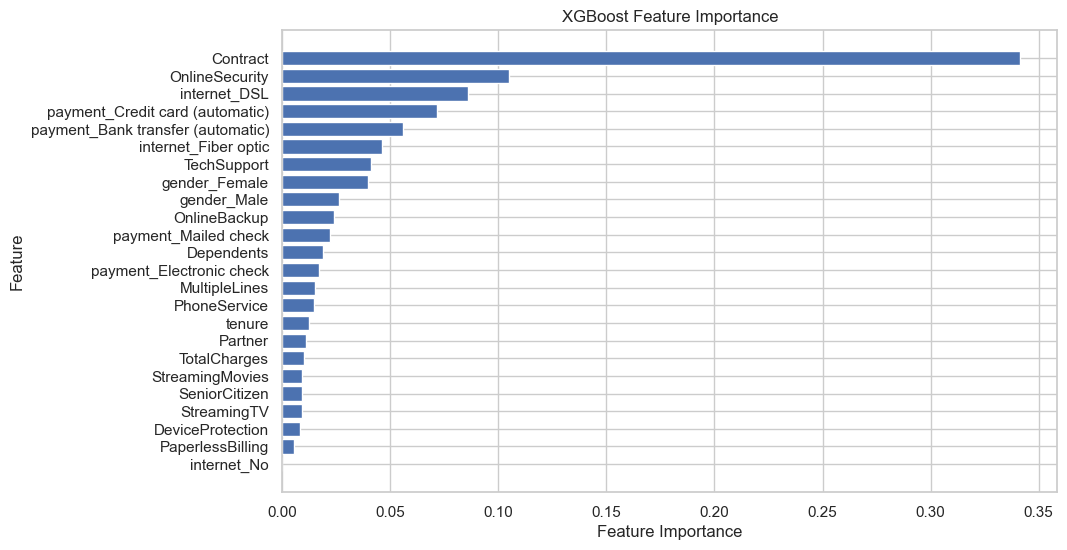

In [40]:
# XGBoost
importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is your feature matrix

# Create a sorted index based on feature importances
sorted_index = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_index)), importances[sorted_index], align="center")
plt.yticks(range(len(sorted_index)), [feature_names[i] for i in sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()

For the XGB model, we see that `TotalCharges`,`tenure`, `Contract`, `OnlineSecurity`,  and `TechSupport` are the top 5 most importance features. 